# **Stock Price Prediction**

installing and importing necessary libraries and modules

In [1]:
!pip install yfinance
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


downloading Apple stock data from yfinanace

In [2]:
# Download Apple stock data
data = yf.download('AAPL', start='2020-01-01', end='2023-01-01')
print(data.head())

# Use 'Close' prices
close_prices = data['Close'].values.reshape(-1, 1)

[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.538513  72.598892  71.292304  71.545890  135480400
2020-01-03  71.833290  72.594055  71.608685  71.765667  146322800
2020-01-06  72.405670  72.444313  70.703005  70.954181  118387200
2020-01-07  72.065170  72.671364  71.845392  72.415360  108872000
2020-01-08  73.224403  73.526295  71.768079  71.768079  132079200


normalizing data

In [3]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)


preparing the sequences

In [4]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)

print(X.shape, y.shape)


(696, 60, 1) (696, 1)


spliting the data for training and testing

In [5]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


building LSTM model

In [6]:
timesteps = 10  # number of past time steps
features = 1    # number of features (e.g., closing price)

model = Sequential()
model.add(Input(shape=(timesteps, features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

training the LSTM model

In [7]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - loss: 0.3294 - val_loss: 0.3187
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.1221 - val_loss: 0.0358
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0077 - val_loss: 0.0038
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - loss: 0.0031 - val_loss: 0.0046
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - loss: 0.0024 - val_loss: 0.0041
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - loss: 0.0017 - val_loss: 0.0048
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0016 - val_loss: 0.0033
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0014 - val_loss: 0.0031
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0014 - val_loss: 0.0036
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0014 - val_loss: 0.0037
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0014 - val_loss: 0.0029
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.

predicting using test data

In [8]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
actual = scaler.inverse_transform(y_test)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


visualizing using matplotlib

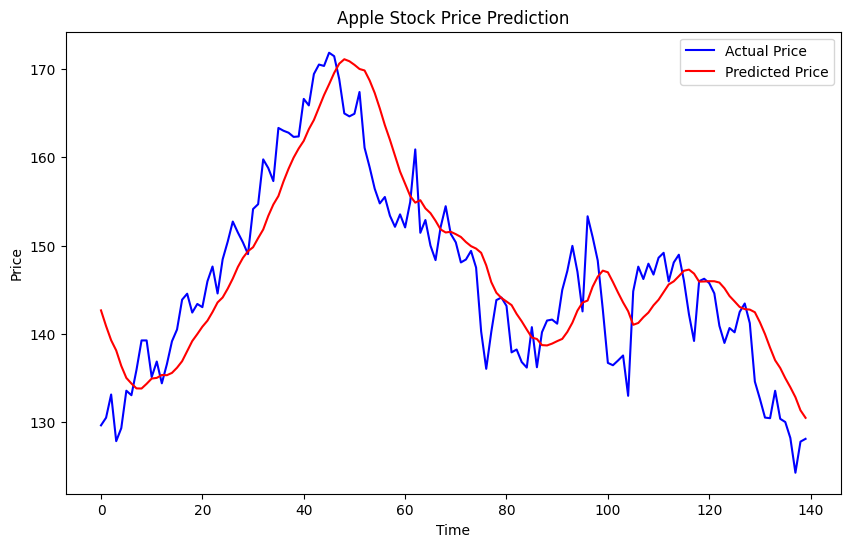

In [9]:
plt.figure(figsize=(10,6))
plt.plot(actual, color='blue', label='Actual Price')
plt.plot(predictions, color='red', label='Predicted Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()